## Micro Gas Turbine Energy Consumption

In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve
import seaborn as sns

## Preprocessing

In [ ]:
file_paths = [
    'train_1.csv',
    'train_2.csv',
    'train_3.csv',
    'train_4.csv',
    'train_5.csv',
    'train_6.csv',
    'test_1.csv'
]

train_dfs = [pd.read_csv(file) for file in file_paths[:6]]
train_df = pd.concat(train_dfs, ignore_index=True)

test_df = pd.read_csv(file_paths[6])

print(train_df.head())

        time  input_voltage     el_power
0  810.07028           10.0  1228.791720
1  811.06938           10.0  1223.041745
2  812.06848           10.0  1244.960866
3  813.06758           10.0  1229.259058
4  814.06668           10.0  1248.117024


## Analysis

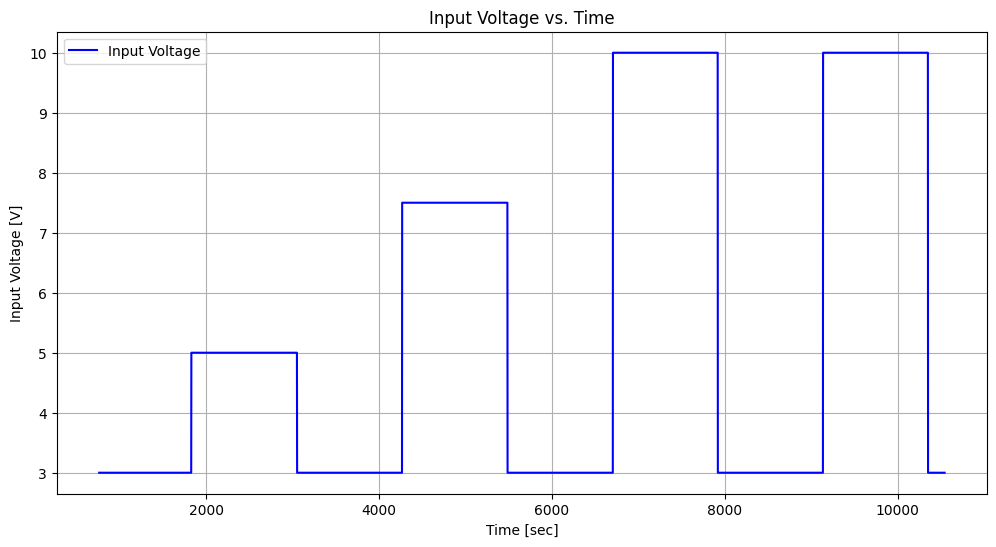

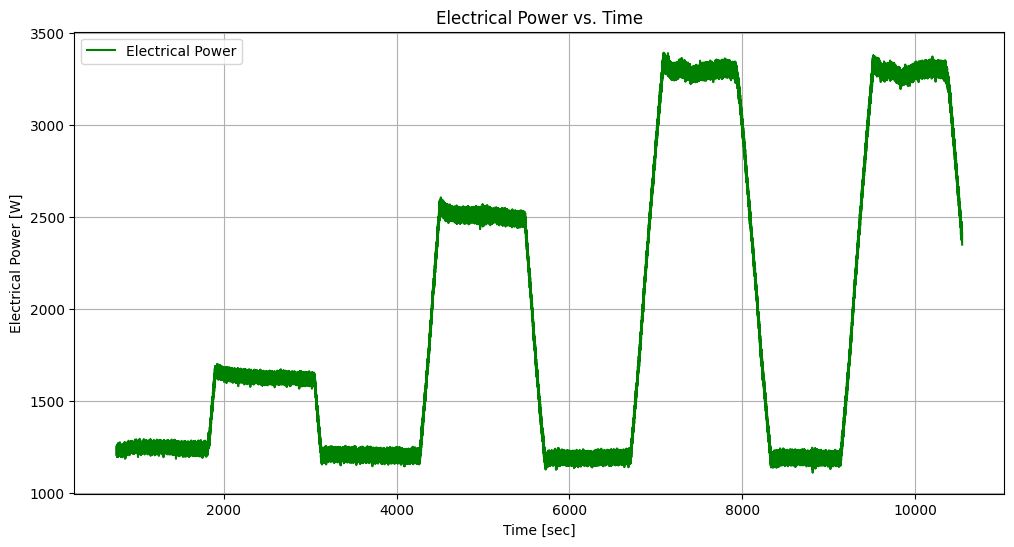

In [ ]:
test_df = pd.read_csv('test_1.csv')

# Input Voltage vs. Time
plt.figure(figsize=(12, 6))
plt.plot(test_df['time'], test_df['input_voltage'], color='blue', label='Input Voltage')
plt.xlabel('Time [sec]')
plt.ylabel('Input Voltage [V]')
plt.title('Input Voltage vs. Time')
plt.legend()
plt.grid(True)
plt.show()

# Electrical Power vs. Time
plt.figure(figsize=(12, 6))
plt.plot(test_df['time'], test_df['el_power'], color='green', label='Electrical Power')
plt.xlabel('Time [sec]')
plt.ylabel('Electrical Power [W]')
plt.title('Electrical Power vs. Time')
plt.legend()
plt.grid(True)
plt.show()

## Model Training

In [ ]:
train_dfs = [pd.read_csv(file) for file in file_paths]
train_df = pd.concat(train_dfs, ignore_index=True)

test_df = pd.read_csv('test_1.csv')

X_train = train_df[['input_voltage']]
y_train = train_df['el_power']

X_test = test_df[['input_voltage']]
y_test = test_df['el_power']

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Evaluation

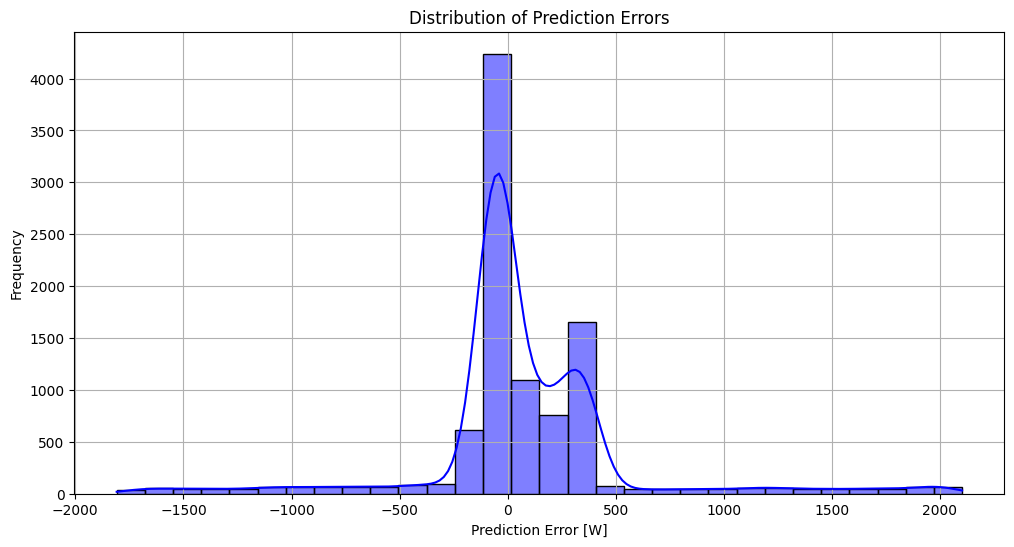

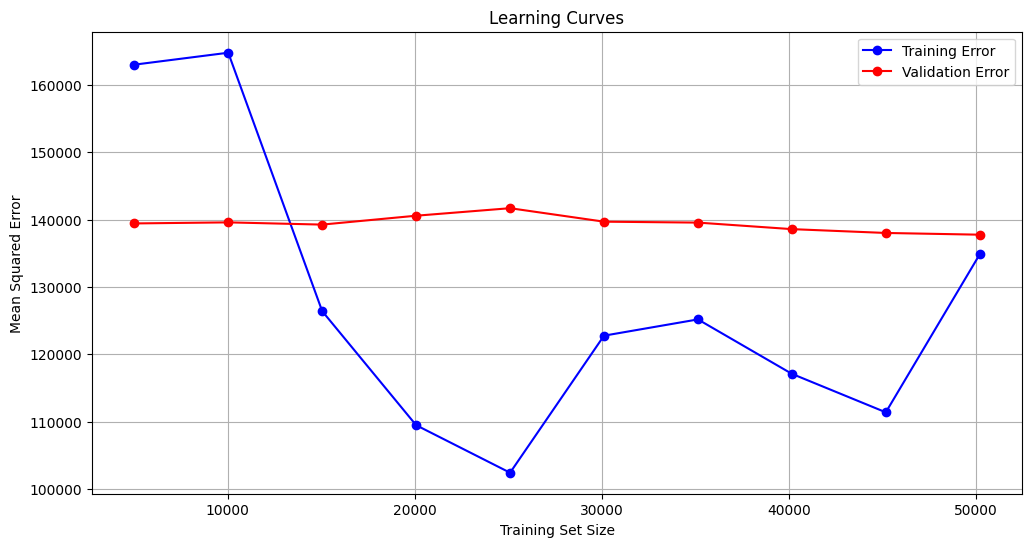

Mean Squared Error: 236800.6401296233
R^2 Score: 0.647773511404588


In [41]:
# Error distribution with KDE curve
errors = y_test - y_pred
plt.figure(figsize=(12, 6))
sns.histplot(errors, bins=30, kde=True, color='blue')
plt.xlabel('Prediction Error [W]')
plt.ylabel('Frequency')
plt.title('Distribution of Prediction Errors')
plt.grid(True)
plt.show()

# Learning curves
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Error')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validation Error')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

## Model Application

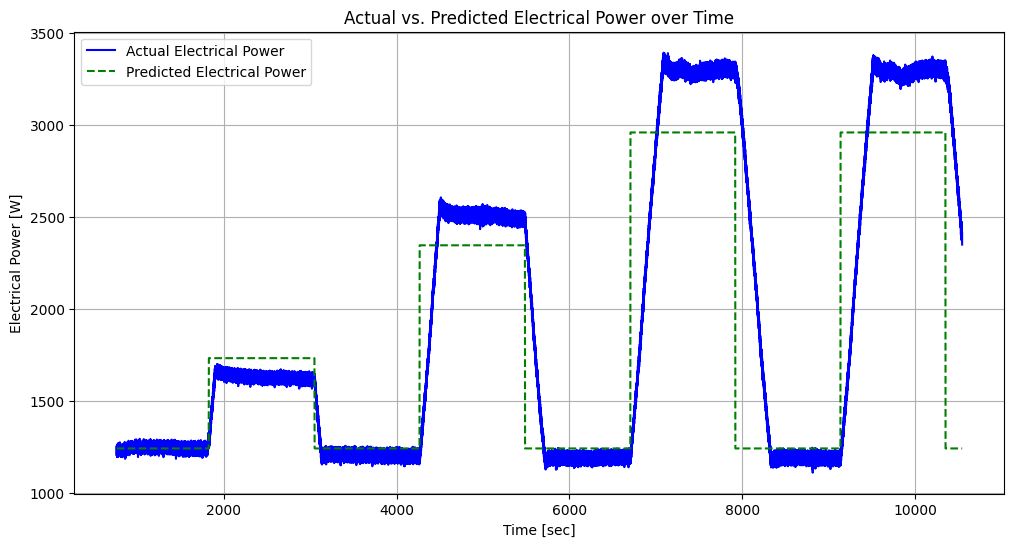

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_df['time'], y_test, color='blue', label='Actual Electrical Power')
plt.plot(test_df['time'], y_pred, color='green', linestyle='--', label='Predicted Electrical Power')
plt.xlabel('Time [sec]')
plt.ylabel('Electrical Power [W]')
plt.title('Actual vs. Predicted Electrical Power over Time')
plt.legend()
plt.grid(True)
plt.show()